PAREENITA A.SHIRSATH  ROLL.NO : 57 B.E.A.I.&.D.S.

DL EXPERIMENT NO : 08  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.8043 - loss: 0.7092
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9530 - loss: 0.1531
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9708 - loss: 0.0950
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9772 - loss: 0.0759
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9805 - loss: 0.0617
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9841 - loss: 0.0522
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9852 - loss: 0.0465
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9875 - loss: 0.0410
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.9893 - loss: 0.0361
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9904 - loss: 0.0310
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9810 - loss: 0.0542
Accuracy: 0.9847999811172485
Training Data: 

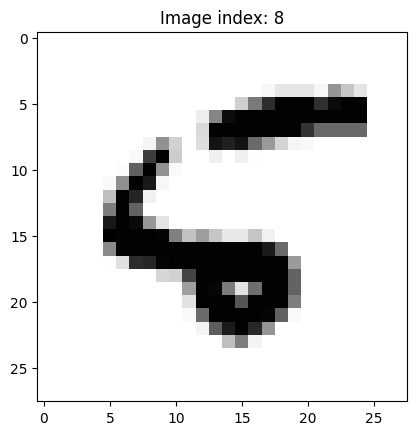

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted label for image 8: 5


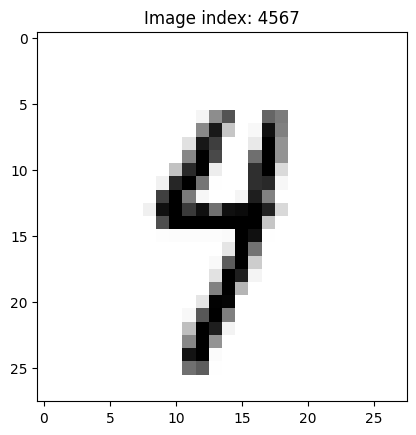

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted label for image 4567: 4


In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
rows, cols = 28, 28
# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)
# Set type as float32
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
def build_lenet(input_shape):
    # Define Sequential Model
    model = tf.keras.Sequential()
    # Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=6, strides=(1, 1), kernel_size=(5, 5),
activation='tanh', input_shape=input_shape))
    # SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Convolution Layer
    model.add(tf.keras.layers.Conv2D(filters=6, strides=(1, 1), kernel_size=(5, 5),
activation='tanh'))
    # SubSampling Layer
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten the output (Important: Flatten before Dense layers)
    model.add(tf.keras.layers.Flatten())
    # Fully Connected Layer
    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))
    # Dense Layers
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
    # Output Layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    return model
# Build the model
lenet = build_lenet(input_shape)
# Compile the model
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs, batch_size=128, verbose=1)
# Check Accuracy of the Model
if len(y_test.shape) != 2 or y_test.shape[1] != 10:
    y_test = tf.keras.utils.to_categorical(y_test, 10)
loss, acc = lenet.evaluate(x_test, y_test)
print('Accuracy:', acc)
# Reshape for plotting
x_train_plot = x_train.reshape(x_train.shape[0], 28, 28)
x_test_plot = x_test.reshape(x_test.shape[0], 28, 28)
print('Training Data:', x_train_plot.shape, y_train.shape)
print('Test Data:', x_test_plot.shape, y_test.shape)
# Plot the Image
image_indices = [8, 4567] # Changed indices to be within bounds
for idx in image_indices:
    # Plot the image
    plt.imshow(x_test_plot[idx], cmap='Greys')
    plt.title(f"Image index: {idx}")
    plt.show()
    # Make prediction
    pred = lenet.predict(x_test[idx].reshape(1, rows, cols, 1))
    print(f'Predicted label for image {idx}:', pred.argmax())